## COMPUTING THE NEW CLUSTER CENTRES

In [55]:
def compute_new(points, colors, centers,k):
    new_centroids=np.zeros(shape=(3,2))
    sum_red=0
    sum_green=0
    sum_blue=0
    r=0
    g=0
    b=0
#     print(colors)
    for i in range (len(points)):
        if(colors[i]=="red"):
            sum_red=sum_red+points[i][0]
            r=r+1
        elif(colors[i]=="green"):
            sum_green=sum_green+points[i][0]
            g=g+1
        else:
            b=b+1
            sum_blue=sum_blue+points[i][0]
    
    new_centroids[0][0]= sum_red/r
    new_centroids[1][0]= sum_green/g
    new_centroids[2][0]= sum_blue/b
        
    sum_red=0
    sum_green=0
    sum_blue=0
    r=0
    g=0
    b=0
    
    for i in range(len(points)):
        if(colors[i]=="red"):
            sum_red=sum_red+points[i][1]
            r=r+1
        elif(colors[i]=="green"):
            sum_green=sum_green+points[i][1]
            g=g+1
        else:
            sum_blue=sum_blue+points[i][1]
            b=b+1
    
    new_centroids[0][1]= sum_red/r
    new_centroids[1][1]= sum_green/g
    new_centroids[2][1]= sum_blue/b
    
    return new_centroids

## FINDING THE CLOSEST CENTROID TO A GIVEN POINT

In [56]:
def find_closest_centroids(x,y):
    distance=[]
    for i in range(len(y)):
        diff= (((x[0]-y[i][0])**2)+(x[1]-y[i][1])**2)
        distance.append(math.sqrt(diff))
#     print(np.argmin(distance))
    return np.argmin(distance)

## ASSIGNING THE COLOR OF THE CLOSEST CENTROID

In [ ]:
def dist(a, b, ax=1):
    
    return np.linalg.norm(a - b, axis=ax)



In [ ]:

def classify_points(img, centroids):
   
    clusters = np.zeros(img.shape[:2], np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            distance = dist(img[i][j], centroids)
            cluster = np.argmin(distance)
            clusters[i][j] = cluster
            img[i][j] = centroids[cluster]
    return clusters, img


In [89]:
def compute_new_centroid(k, image, clusters):
    rows, columnss = image.shape[:2]
    centroids = np.zeros(k, dtype=(np.uint8, 3))
    for i in range(k):
        points = [image[j][l] for j in range(rows) for l in range(columns) if clusters[j][l] == label]
        centroids[i] = np.mean(points, axis=0)
    return centroids


In [57]:
def color_update(points, centroids):
    
    color=[]
    #     print(len(centroids))
    for i in range(len(points)):
        closest=find_closest_centroids(points[i], centroids)
        if(closest==0):
            color.append('red')
        elif(closest==1):
            color.append("green")
        else:
            color.append("blue")   
#     print(color)  
    
    return color           
               
                  

## Task 3.4 image quantization

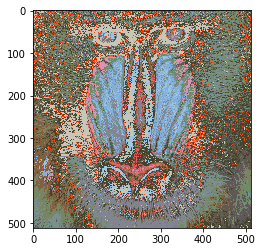

True

In [88]:


img = cv2.imread('baboon.jpg')

k = 20


rand_r, rand_c = np.random.randint(img.shape[0], size=(2, k))
centers = np.zeros(k, dtype=(np.uint8, 3))

centroids_old = np.zeros(centers.shape)
                                                    #referred to following source for code:
for c, (i, j) in enumerate(zip(rand_r, rand_c)): #https://www.pyimagesearch.com/2014/07/07/color-quantization-opencv-using-k-means-clustering/

    centers[c] = img[i][j]

error = dist(centers, centroids_old, None)

while error != 0:
    clusters, quantized_img = classify_points(img, centers)
    centroids_old = deepcopy(centers)

    centers = compute_new_centroid(k, img, clusters)
    error = dist(centers, centroids_old, None)


plt.imshow(cv2.cvtColor(quantized_img, cv2.COLOR_BGR2RGB), interpolation='nearest')
plt.show()
cv2.imwrite("task3_baboon_"+str(k)+".jpg" , quantized_img)









In [66]:
def main():
    x=np.array([[5.9,3.2],
               [4.6,2.9],
               [6.2,2.8],
               [4.7,3.2],
               [5.5,4.2],
               [5.0,3.0],
               [4.9,3.1],
               [6.7,3.1],
               [5.1,3.8],
               [6.0,3.0]])
    color=[]
    
    centroids=np.array([[6.2,3.2],
               [6.6,3.7],
               [6.5,3.0]])
#     print(len(centroids))
    
   

    colors=[]
    k=3
    iterations=1
    
    
    #task 3.1
    colors=color_update(x,centroids)
    
    plt.scatter(x[:,0],x[:,1],facecolor='none', edgecolor=colors, marker="^")
    plt.show()
    
    print(centroids)
    #task 3.2
  
    plt.scatter(centroids[:,0],centroids[:,1],color=['red','green','blue'])
    plt.scatter(x[:,0],x[:,1],facecolor='none', edgecolor=colors, marker="^")
    plt.show()

    for i in range(5):
        centroids= compute_new(x,colors, centroids,k)
        colors=color_update(x,centroids)
        
        print("--------",i+1,"time updated weights---------")
        print(updated_centroids)
        plt.scatter(centroids[:,0],centroids[:,1],color=['red','green','blue'])
        plt.scatter(x[:,0],x[:,1],facecolor='none', edgecolor=colors, marker="^")
        plt.show()
        
        
            
       
    

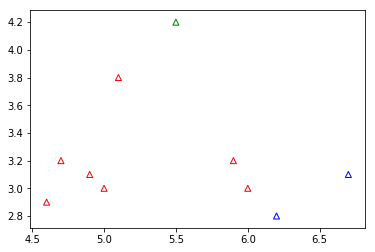

[[6.2 3.2]
 [6.6 3.7]
 [6.5 3. ]]


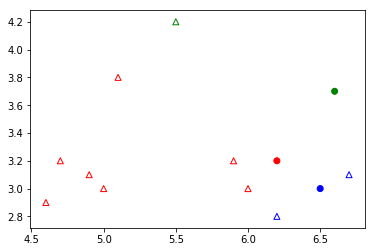

-------- 1 time updated weights---------
[[5.17142857 3.17142857]
 [5.5        4.2       ]
 [6.45       2.95      ]]


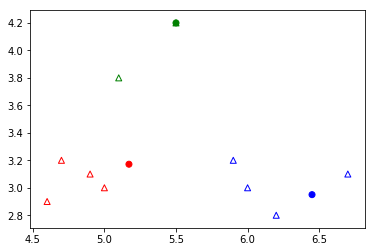

-------- 2 time updated weights---------
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


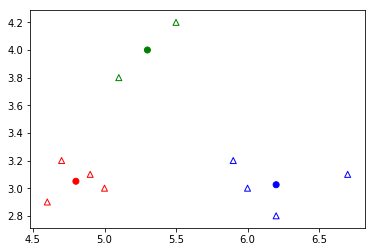

-------- 3 time updated weights---------
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


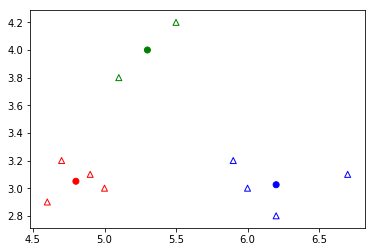

-------- 4 time updated weights---------
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


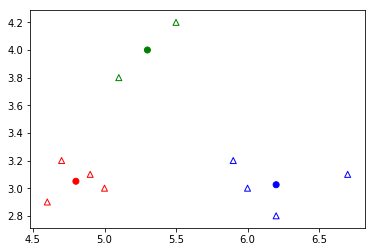

-------- 5 time updated weights---------
[[4.8   3.05 ]
 [5.3   4.   ]
 [6.2   3.025]]


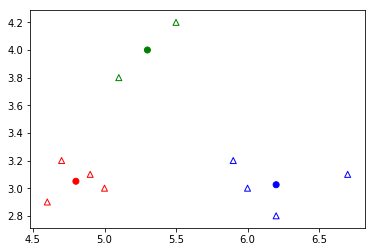

In [67]:
if __name__=="__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    import math
    import numpy as np
    from copy import deepcopy
    import matplotlib.pyplot as plt
    import cv2
    UBIT = 'mkulshre'
    np.random.seed(sum([ord(c) for c in UBIT]))
    main()